In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from wotan import flatten
import bin_tools



In [2]:
###'/data/jpr64/NG0535-0523_802_2017,2017S_CYCLE1807.fits'

def load_file(filename):
    """Loads the NGTS data file in my files and returns the hdu object"""
    hdu = fits.open(filename)
    return hdu

def load_obj(obj_index):
    """Loads the time series and flux for a given obj_index (not id) then removes points with 0 flux. """
    obj_index = int(obj_index)
    time = hdu['hjd'].data[obj_index]
    time = time / (24*60*60)
    
    flux = hdu['sysrem_flux3'].data[obj_index]
    flux[flux == 0] = np.nan
    
    flux_mean = hdu['catalogue'].data['flux_mean']
    flux_mean = flux_mean[obj_index]
    return time, flux, flux_mean
    
    

In [3]:
hdu = load_file('/data/jpr64/NG0535-0523_802_2017,2017S_CYCLE1807.fits')
time, flux, f_mean = load_obj(4129)
flux /= f_mean



In [4]:
### Rebinning data
time_rebin, flux_rebin, junk = bin_tools.rebin_err_chunks(time, flux, dt=(1/240), max_gap=0.5)

print(np.size(time_rebin))


4632


<IPython.core.display.Javascript object>


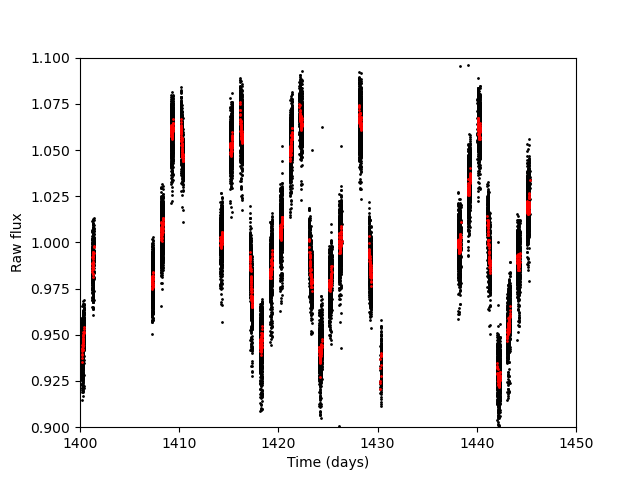

In [5]:
%matplotlib notebook
plt.scatter(time, flux, s=1, color='black')
plt.scatter(time_rebin, flux_rebin, s=1, c='red')
# plt.scatter(time, flatten_lc, s=1, color='black')
# plt.plot(time, trend_lc, linewidth=2, color='red')
plt.xlabel('Time (days)')
plt.ylabel('Raw flux')
plt.xlim(1400, 1450)
plt.ylim(0.9, 1.1);
plt.show();

In [7]:
###Looking at detrended LC

flatten_lc, trend_lc = flatten(
    time_rebin,                 # Array of time values
    flux_rebin,                 # Array of flux values
    method='lowess',
    window_length = 0.5,    # The length of the filter window in units of ``time``
    break_tolerance = 0.3,    # Split into segments at breaks longer than that
    return_trend=True,    # Return trend and flattened light curve
    )



<IPython.core.display.Javascript object>


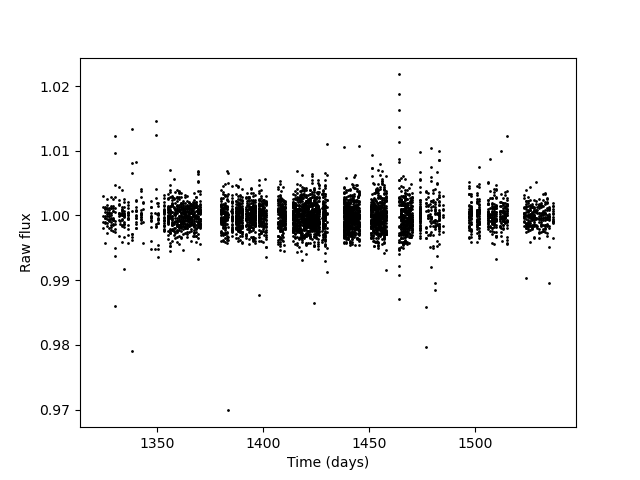

In [8]:
%matplotlib notebook
# plt.scatter(time_rebin, flux_rebin, s=1, color='black')
plt.scatter(time_rebin, flatten_lc, s=1, color='black')
# plt.plot(time_rebin, trend_lc, linewidth=1, color='red')
plt.xlabel('Time (days)')
plt.ylabel('Raw flux')
# plt.xlim(1400, 1450) 
# plt.ylim(0.9, 1.1);
plt.show();

<IPython.core.display.Javascript object>


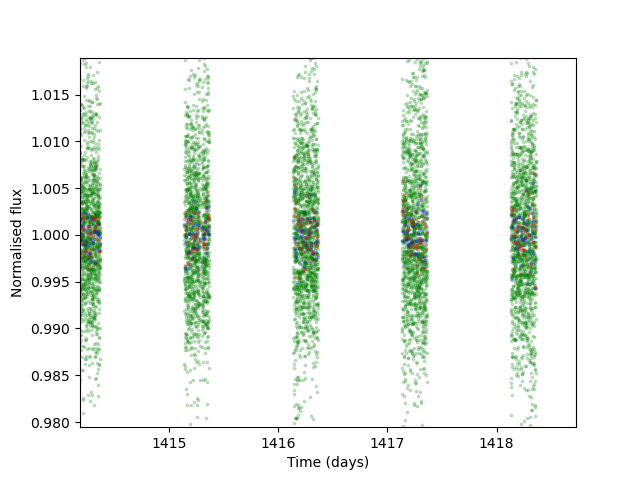

In [12]:
flatten_lc1, trend_lc1 = flatten(time_rebin, flux_rebin, window_length=0.03, break_tolerance = 0.3, return_trend=True)
flatten_lc2, trend_lc2 = flatten(time_rebin, flux_rebin, window_length=0.1, break_tolerance = 0.3, return_trend=True)
flatten_lc3, trend_lc3 = flatten(time_rebin, flux_rebin, window_length=0.5, break_tolerance = 0.3,  return_trend=True)
flatten_l0, trend_l0 = flatten(time, flux, window_length=0.03, break_tolerance = 0.3, return_trend=True)
plt.close()

plt.scatter(time, flatten_l0, s=3, alpha=0.2, color='green')
# plt.scatter(time, flux, alpha = 0.2, color='black')
plt.scatter(time_rebin, flatten_lc1, s=3, alpha = 0.2, color='blue') 
plt.scatter(time_rebin, flatten_lc2, s=3, alpha = 0.2, color='red') 
# plt.scatter(time_rebin, flatten_lc3, s=3, alpha = 0.2, color='green')  
# plt.xlim(1400, 1450)
# plt.ylim(0.9, 1.1)
plt.xlabel('Time (days)')
plt.ylabel('Normalised flux')
plt.show();

In [ ]:
print(flux)